In [1]:
%env KERAS_BACKEND=tensorflow

env: KERAS_BACKEND=tensorflow


In [2]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

# 讀入MNIST數據庫

In [3]:
from keras.datasets import mnist

E:\Anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [4]:
(x_train0,y_train0),(x_test0,y_test0) = mnist.load_data()

## 輸入格式整理

每筆輸入的資料都是28x28的陣列，CNN是吃圖的，因次不用將資料拉平。但是，平常的圖都有R,G,B三個channels,每個channel都是一個矩陣，也就是一張圖是三個矩陣!我們是灰階，也就是只有一個channel。這件事也要明確告訴keras。

### 也就是說，資料型式要從(28,28)改成(28,28,1)

In [5]:
x_train0[1234].shape

(28, 28)

In [6]:
x_train = x_train0.reshape(60000,28,28,1)
x_test = x_test0.reshape(10000,28,28,1)

In [7]:
x_train[1234].shape

(28, 28, 1)

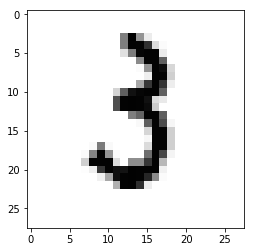

In [8]:
plt.imshow(x_train[1234].reshape(28,28),cmap='Greys')

# 輸出格式整理
### 一樣用 1-hot encoding 處理

In [9]:
from keras.utils import np_utils

In [10]:
y_train = np_utils.to_categorical(y_train0,10)
y_test = np_utils.to_categorical(y_test0,10)

## 標準化資料
沒有標準化的訓練結果很不穩定

In [11]:
x_train = x_train/255
x_test = x_test/255

# 建造神經網路

第一個隱藏層要告訴keras圖形長28x28

In [12]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from keras.layers import Conv2D, MaxPool2D # 2D --> matrics
from keras.optimizers import SGD

In [13]:
model = Sequential()  

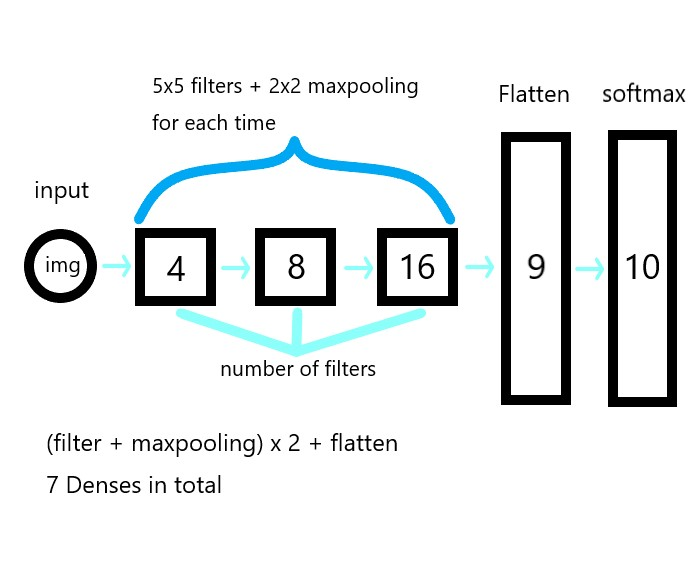

1st Convolution

In [14]:
model.add(Conv2D(4,(5,5),padding='same',input_shape=(28,28,1))) 
# Conv2D(filters, filter_shape)
# 4 filters with size of 5x5
# padding = same  means the shape of the metrics remains after convolution(filter)
model.add(Activation('relu'))

Maxpooling!

In [15]:
model.add(MaxPool2D(pool_size=(2,2)))

2nd Convolution

In [16]:
model.add(Conv2D(8,(5,5),padding='same')) 
model.add(Activation('relu'))

再 Maxpooling

In [17]:
model.add(MaxPool2D(pool_size=(2,2)))

3rd Concolution

In [18]:
model.add(Conv2D(16,(5,5),padding='same')) 
model.add(Activation('relu'))

最後一次 Maxpooling

In [19]:
model.add(MaxPool2D(pool_size=(2,2)))

然後要拉平送入一般的神經網路

In [20]:
model.add(Flatten())
model.add(Dense(9)) # 9個神經元
model.add(Activation('relu'))

In [21]:
model.add(Dense(10))
model.add(Activation('softmax'))

## 組裝
和之前比較不一樣的是我們還要做 compile 才正式把神經網路建好 

In [22]:
# model.compile(loss='categorical_crossentropy',
#              optimizer=Adadelta(),
#              metrics=['accuracy'])

In [23]:
model.compile(loss="mse",optimizer=SGD(lr=0.07),metrics=['accuracy'])

### 通常，回歸問題會使用 mse , 分類問題會使用 crossentropy

In [24]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 4)         104       
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 4)         0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 4)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 8)         808       
_________________________________________________________________
activation_2 (Activation)    (None, 14, 14, 8)         0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 16)          3216      
__________

In [25]:
# conv2d_1 = 104 = filter_size*filters+bias = 5*5*4+4

# 訓練

In [26]:
model.fit(x_train,y_train,batch_size=100,epochs=10)

Epoch 1/10
60000/60000 [==============================] - 7s 111us/step - loss: 0.0896 - acc: 0.1117
Epoch 2/10
60000/60000 [==============================] - 3s 45us/step - loss: 0.0884 - acc: 0.1567
Epoch 3/10
60000/60000 [==============================] - 3s 44us/step - loss: 0.0835 - acc: 0.2776
Epoch 4/10
60000/60000 [==============================] - 3s 45us/step - loss: 0.0622 - acc: 0.5374
Epoch 5/10
60000/60000 [==============================] - 3s 44us/step - loss: 0.0452 - acc: 0.6895
Epoch 6/10
60000/60000 [==============================] - 3s 45us/step - loss: 0.0394 - acc: 0.7254
Epoch 7/10
60000/60000 [==============================] - 3s 45us/step - loss: 0.0306 - acc: 0.7884
Epoch 8/10
60000/60000 [==============================] - 3s 44us/step - loss: 0.0246 - acc: 0.8295
Epoch 9/10
60000/60000 [==============================] - 3s 45us/step - loss: 0.0230 - acc: 0.8383
Epoch 10/10
60000/60000 [==============================] - 3s 45us/step - loss: 0.0218 - acc: 0.844